# Preprocessing data

Before we can start building machine learning models, we need to preprocess the data. Preprocessing reshapes the data into a format that can be use to train machine learning models. Some preprocessing steps are generic across different types of machine learning models, but some steps are specific for certain types of machine learning models. We will go over the most common preprocessing steps in this notebook.

We start by loading the data:

In [ ]:
import os

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    os.environ['DATA_DIRECTORY'] = '/content'
else:
    os.environ['DATA_DIRECTORY'] = '../../data'

data_directory = os.getenv('DATA_DIRECTORY')

In [ ]:
%%bash
if [ ! -f "$DATA_DIRECTORY/course-data.zip" ]; then
    wget "https://gitlab.com/api/v4/projects/52375047/jobs/artifacts/master/raw/data/course-data.zip?job=build_data_zip" -O "$DATA_DIRECTORY/course-data.zip"
    unzip "$DATA_DIRECTORY/course-data.zip" -d "$DATA_DIRECTORY"
fi

In [ ]:
import pandas as pd 

house_prices_df = pd.read_csv(os.path.join(data_directory, "house-prices/train.csv"), sep= ",", index_col = "Id")

As said before, the house prices dataset is part of a Kaggle competition. In this competition, the goal is to train a machine learning model using the training set in `train.csv` and then using that model to predict the price of the houses in the test dataset `test.csv`. The team that makes the best predictions for the test dataset is the winner of the competition. In the code above, we load both the training and test dataset.

We can inspect the first few rows of the training dataframe using the `head()` function.

In [59]:
house_prices_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

## Missing values

In the previous notebook, we saw that the dataset contains missing values. We repeated the code below to show the number of missing values per column.

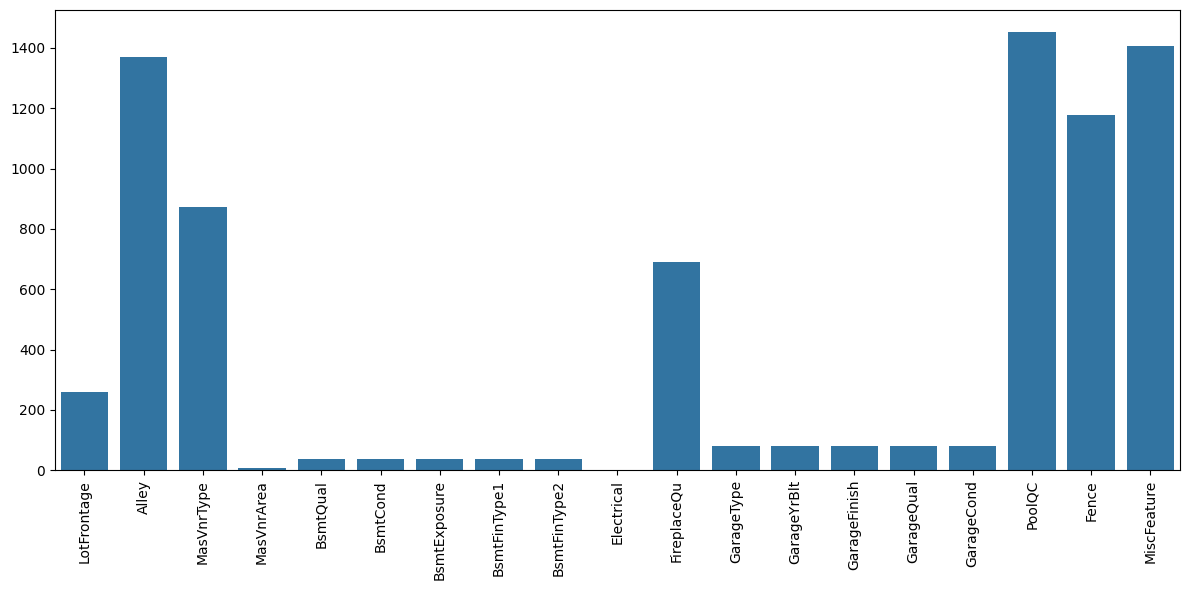

In [60]:
columns_indices_missing_values = house_prices_df.isna().any()
columns_with_missing_values = house_prices_df.columns[columns_indices_missing_values].tolist()
columns_with_missing_values

number_of_missing_values = { column_name: house_prices_df[column_name].isna().sum() for column_name in columns_with_missing_values }
number_of_missing_values

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.barplot(x=list(number_of_missing_values.keys()), y=list(number_of_missing_values.values()))
plt.xticks(rotation=90)
plt.tight_layout()


The barplot above shows that the columns with the most missing values are the 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', and 'MiscFeature' columns. Missing values can be a problem for machine learning models, so we need to deal with them. There are several ways to deal with missing values, such as:

- Removing the rows with missing values
- Removing the columns with missing values
- Imputing the missing values
- Using a machine learning model that can handle missing values

In this notebook, we will use the second option and remove the columns with missing values. We will remove the columns with more than 50% missing values. We will use the `dropna()` function to remove the columns with missing values.

In [61]:
house = house_prices_df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)
house.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                          
1           60       RL         65.0     8450   Pave      Reg         Lvl   
2           20       RL         80.0     9600   Pave      Reg         Lvl   
3           60       RL         68.0    11250   Pave      IR1         Lvl   
4           70       RL         60.0     9550   Pave      IR1         Lvl   
5           60       RL         84.0    14260   Pave      IR1         Lvl   

   Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
Id                                ...                                       
1     AllPub    Inside       Gtl  ...             0         0           0   
2     AllPub       FR2       Gtl  ...             0         0           0   
3     AllPub    Inside       Gtl  ...             0         0           0   
4     AllPub    Corner       Gtl  ...           272         0           0   
5     AllPub       FR2       Gtl  ...             0         0           0   

   PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
Id                                                                      
1         0       0       2    2008        WD         Normal    208500  
2         0       0       5    2007        WD         Normal    181500  
3         0       0       9    2008        WD         Normal    223500  
4         0       0       2    2006        WD        Abnorml    140000  
5         0       0      12    2008        WD         Normal    250000  

[5 rows x 76 columns]

In [62]:
columns_indices_missing_values = house.isna().any()
columns_with_missing_values = house.columns[columns_indices_missing_values].tolist()
columns_with_missing_values

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

# Retrieving the column names by type of variable

The columns in the dataset can be divided into different types of variables, such as numerical variables, variables which have a numerical, often continuous value,  and categorical variables, variables with a limited number of values that represent a category. In the house prices dataset, numerical variables have a numerical data type, whereas categorical columns have the type `object`, which in this case means they contain string values. The columns often need to be preprocessed in a different way. We will retrieve the column names for each type of variable.

In [63]:
numerical_columns = house.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = house.select_dtypes(include=['object']).columns.tolist()

### Numerical variables

In [64]:
numerical_columns = list(set(numerical_columns) - set(["SalePrice"]))
numerical_columns

['YearBuilt',
 'TotalBsmtSF',
 'LotArea',
 'GrLivArea',
 'LotFrontage',
 'LowQualFinSF',
 'MiscVal',
 '3SsnPorch',
 'GarageYrBlt',
 'WoodDeckSF',
 'BsmtFinSF2',
 'OpenPorchSF',
 'EnclosedPorch',
 'YearRemodAdd',
 'BsmtUnfSF',
 'BsmtFullBath',
 'OverallQual',
 'GarageCars',
 'YrSold',
 '2ndFlrSF',
 'MSSubClass',
 'HalfBath',
 'PoolArea',
 'TotRmsAbvGrd',
 'GarageArea',
 'BedroomAbvGr',
 '1stFlrSF',
 'MoSold',
 'Fireplaces',
 'KitchenAbvGr',
 'OverallCond',
 'ScreenPorch',
 'BsmtHalfBath',
 'FullBath',
 'BsmtFinSF1',
 'MasVnrArea']

### Categorical variables

In [65]:
categorical_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

## Scaling values

For some machine learning models, it is important to scale the values of the numerical variables. Scaling the values of the numerical variables can help the machine learning model to converge faster and can improve the performance of the model. There are several ways to scale the values of the numerical variables, such as:

- Min-max scaling, which scales the values to a fixed range, usually between 0 and 1
- Standard scaling, which scales the values so that they have a mean of 0 and a standard deviation of 1
- Robust scaling, which scales the values so that they are robust to outliers

In this notebook, we will use the `StandardScaler` from the `sklearn.preprocessing` module to scale the values of the numerical variables. 

In [66]:
from sklearn.preprocessing import StandardScaler

house[numerical_columns] = StandardScaler().fit_transform(house[numerical_columns])

## Impute missing values

We have seen that several columns have missing values:

In [67]:
numerical_columns_with_missing_values = list(set(columns_with_missing_values).intersection(set(numerical_columns)))
numerical_columns_with_missing_values

['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

For the machine learning model to work, we need to impute the missing values. There are several ways to impute missing values, such as, imputing the missing values with the mean, median, or mode of the column.  Here we will use the `SimpleImputer` from the `sklearn.impute` module to impute the missing values with the median of the column.  

In [68]:
from sklearn.impute import SimpleImputer

house[numerical_columns_with_missing_values] = SimpleImputer(strategy='median').fit_transform(house[numerical_columns_with_missing_values])
house[numerical_columns_with_missing_values].isnull().sum().to_frame()

0
LotFrontage  0
GarageYrBlt  0
MasVnrArea   0

We can see that none of the numerical columns in the table above have missing values.

## Encoding categorical variables

Machine learning models can only work with numerical data, so we need to encode the categorical variables. There are several ways to encode categorical variables, such as:

- Label encoding, which assigns a unique integer to each category
- One-hot encoding, which creates a binary column for each category, a categorical column with `n` categories will be transformed into `n` binary columns

In this notebook, we will use one-hot encoding to encode the categorical variables. We will use the `OneHotEncoder` from the `sklearn.preprocessing` module to encode the categorical variables.

In [69]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(house[categorical_columns])
encoder

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

The OneHotEncoder from the `sklearn.preprocessing` module creates new columns for each unique value in a categorical column. The new columns contain binary values, where 1 indicates that the value is present and 0 indicates that the value is not present. Each column gets a new column name that consists of the original column name and the unique value. We retrieve these new column names here:

In [70]:
encoded_categorical_columns = list(encoder.get_feature_names_out(categorical_columns))
encoded_categorical_columns

['MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst

After encoding the categorical columns, we can add them to the dataframe:

In [71]:
house[encoded_categorical_columns] = encoder.transform(house[categorical_columns])

/var/folders/5s/1qqrrxd175v_vzyy65mh_y0m0000gn/T/ipykernel_13001/1655041720.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  house[encoded_categorical_columns] = encoder.transform(house[categorical_columns])
/var/folders/5s/1qqrrxd175v_vzyy65mh_y0m0000gn/T/ipykernel_13001/1655041720.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  house[encoded_categorical_columns] = encoder.transform(house[categorical_columns])
/var/folders/5s/1qqrrxd175v_vzyy65mh_y0m0000gn/T/ipykernel_13001/1655041720.py:1: PerformanceWarning: DataFrame 

The `OneHotEncoder` encodes the categorical columns and creates a new column for each category in the categorical columns. We have added the new encoded columns to the dataframe and need to remove the original categorical columns. We can do that using the `drop()` function:

In [72]:
house.drop(categorical_columns, axis=1, inplace=True)
house.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                           
1     0.073375    -0.208034 -0.207142     0.651479    -0.517200   1.050994   
2    -0.872563     0.409895 -0.091886    -0.071836     2.179628   0.156734   
3     0.073375    -0.084449  0.073480     0.651479    -0.517200   0.984752   
4     0.309859    -0.414011 -0.096897     0.651479    -0.517200  -1.863632   
5     0.073375     0.574676  0.375148     1.374795    -0.517200   0.951632   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
Id                                                    ...                   
1       0.878668    0.510015    0.575425   -0.288653  ...             0.0   
2      -0.429577   -0.572835    1.171992   -0.288653  ...             0.0   
3       0.830215    0.322174    0.092907   -0.288653  ...             0.0   
4      -0.720298   -0.572835   -0.499274   -0.288653  ...             0.0   
5       0.733308    1.360826    0.463568   -0.288653  ...             0.0   

    SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
Id                                                                   
1            0.0           0.0          1.0                    0.0   
2            0.0           0.0          1.0                    0.0   
3            0.0           0.0          1.0                    0.0   
4            0.0           0.0          1.0                    1.0   
5            0.0           0.0          1.0                    0.0   

    SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
Id                                                                      
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   
5                     0.0                   0.0                   0.0   

    SaleCondition_Normal  SaleCondition_Partial  
Id                                               
1                    1.0                    0.0  
2                    1.0                    0.0  
3                    1.0                    0.0  
4                    0.0                    0.0  
5                    1.0                    0.0  

[5 rows x 287 columns]

# Saving the preprocessed data to disk

After carrying out the preprocessing, we will save the preprocessed data to disk into a new file. We will save the preprocessed data to a new file called `train_preprocessed.csv`. We will use the `to_csv()` function to save the preprocessed data to disk as a CSV file.

In [ ]:
house.to_csv(os.path.join(data_directory, "house-prices/train_preprocessed.csv"), index = False)